In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [ ]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())

In [ ]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

In [ ]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['Family'] = df_test['SibSp'] + df_train['Parch'] + 1

In [ ]:
final_df = pd.DataFrame(df_test['PassengerId'])

In [ ]:
df_train = df_train.drop(['Cabin','PassengerId','Name','Ticket','Parch','SibSp'],axis = 1)
df_test = df_test.drop(['Cabin','PassengerId','Name','Ticket','Parch','SibSp'],axis = 1)

In [ ]:
final_df.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [ ]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
dtype: int64

In [ ]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
dtype: int64

In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_train['Embarked'] = le.fit_transform(df_train['Embarked'])

df_test['Sex'] = le.fit_transform(df_test['Sex'])
df_test['Embarked'] = le.fit_transform(df_test['Embarked'])

In [ ]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,22.0,7.2500,2,2
1,1,1,0,38.0,71.2833,0,2
2,1,3,0,26.0,7.9250,2,1
3,1,1,0,35.0,53.1000,2,2
4,0,3,1,35.0,8.0500,2,1


In [ ]:
df_train.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,32.204208,1.536476,1.904602
std,0.486592,0.836071,0.477990,13.019697,49.693429,0.791503,1.613459
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400,1.000000,1.000000
50%,0.000000,3.000000,1.000000,28.000000,14.454200,2.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,2.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,2.000000,11.000000


In [ ]:
X = df_train.drop(['Survived'],axis=1)
y = df_train['Survived']

In [ ]:
#Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

df_test = scaler.fit_transform(df_test)

In [ ]:
X

array([[ 0.82737724,  0.73769513, -0.56573646, -0.50244517,  0.58595414,
         0.05915988],
       [-1.56610693, -1.35557354,  0.66386103,  0.78684529, -1.9423032 ,
         0.05915988],
       [ 0.82737724, -1.35557354, -0.25833709, -0.48885426,  0.58595414,
        -0.56097483],
       ...,
       [ 0.82737724, -1.35557354, -0.1046374 , -0.17626324,  0.58595414,
         1.29942929],
       [-1.56610693,  0.73769513, -0.25833709, -0.04438104, -1.9423032 ,
        -0.56097483],
       [ 0.82737724,  0.73769513,  0.20276197, -0.49237783, -0.67817453,
        -0.56097483]])

In [ ]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family'], dtype='object')

Pclass


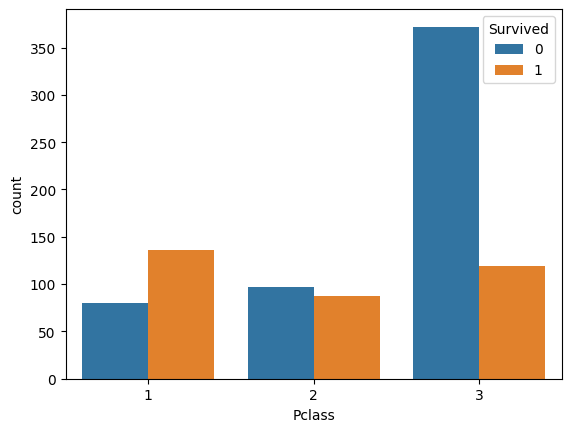

Sex


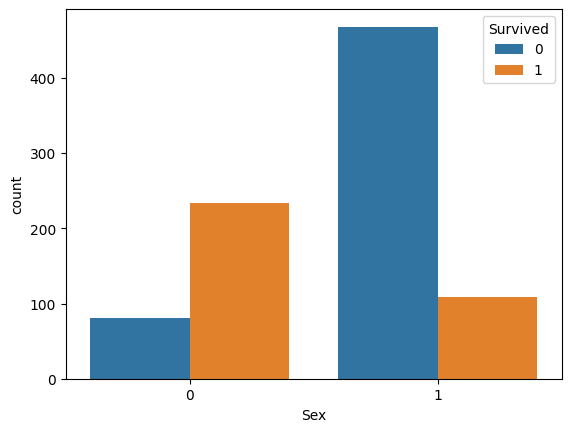

Embarked


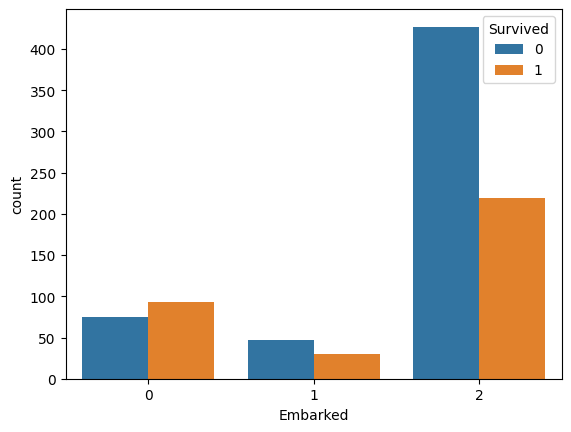

Family


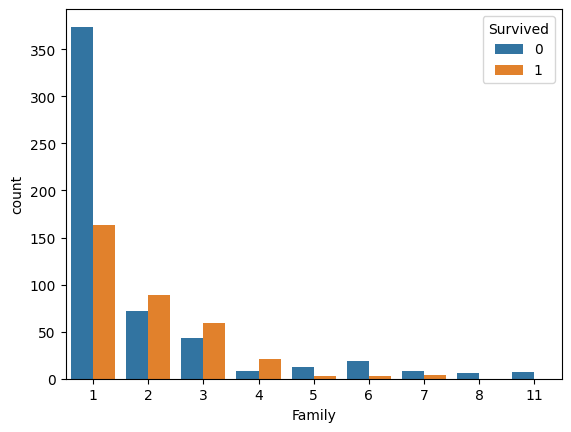

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

col = ['Pclass', 'Sex', 'Embarked', 'Family']
for i in col:
    print(i)
    sns.countplot(x=i,data = df_train,hue='Survived')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
def objective(trial):
    classifier_name = trial.suggest_categorical(
        'classifier',
        ['SVC', 'LogisticRegression', 'RandomForestClassifier', 'GradientBoostingClassifier', 'xgboost']
    )

    if classifier_name == 'SVC':
        svc_c = trial.suggest_float('svc_c', 1e-10, 1e10, log = True)
        kernel = trial.suggest_categorical('kernel', ['rbf', 'linear', 'poly', 'sigmoid'])
        gamma = trial.suggest_categorical('gamma', ['scale', 'auto'] + [1/X_train.shape[1]])

        model = SVC(C=svc_c, kernel=kernel, gamma=gamma, random_state=42)

    elif classifier_name == 'RandomForestClassifier':
        model = RandomForestClassifier(
            n_estimators = trial.suggest_int('n_estimators',50,300),
            max_depth = trial.suggest_int('max_depth',3,20),
            min_samples_split = trial.suggest_int('min_samples_split',2,10),
            min_samples_leaf = trial.suggest_int('min_samples_leaf', 1,10),
            bootstrap = trial.suggest_categorical('bootstrap', [True,False]),
            random_state = 42
        )
        
    elif classifier_name == 'GradientBoostingClassifier':
        model = GradientBoostingClassifier(
            n_estimators = trial.suggest_int('n_estimators',50,300),
            learning_rate = trial.suggest_float('learning_rate',0.001, 1, log=True),
            max_depth = trial.suggest_int('max_depth',3,20),
            min_samples_split = trial.suggest_int('min_samples_split',2,10),
            min_samples_leaf = trial.suggest_int('min_samples_leaf', 1,10),
            random_state = 42
        )

    elif classifier_name == 'LogisticRegression':
        C = trial.suggest_float('C',0.01,1.0)
        solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'sag', 'saga'])
        penalty = trial.suggest_categorical('penalty', ['l1','l2'])

        valid_combos = {
            'liblinear': ['l1','l2'],
            'lbfgs': ['l2'],
            'sag' : ['l2'],
            'saga' : ['l1','l2']
        }
        if penalty not in valid_combos.get(solver,[]):
            raise optuna.exceptions.TrialPruned()

        model = LogisticRegression(
            C=C,
            solver = solver,
            penalty = penalty,
            random_state = 42,
            max_iter = 1000
        )

    elif classifier_name == 'xgboost' :
        model = xgb.XGBClassifier(
            n_estimators = trial.suggest_int('n_estimators',50,300),
            learning_rate = trial.suggest_float('learning_rate',0.001, 1, log=True),
            max_depth = trial.suggest_int('max_depth',3,20),
            min_child_weight= trial.suggest_int('min_child_weight',1,10),
            use_label_encoder=False,
            eval_metric='logloss',
            random_state = 42
        )

    else:
        raise ValueError("Unsupported classifier")

    score = cross_val_score(model,X_train,y_train,cv=3,scoring='accuracy').mean()
    return score;


In [ ]:
import optuna

study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=100)

[I 2025-06-29 07:56:07,379] A new study created in memory with name: no-name-78b79821-a65d-4ac2-9137-6c719911a179
[I 2025-06-29 07:56:07,397] Trial 0 finished with value: 0.6348399246704332 and parameters: {'classifier': 'SVC', 'svc_c': 1.1833167343274257e-09, 'kernel': 'sigmoid', 'gamma': 0.16666666666666666}. Best is trial 0 with value: 0.6348399246704332.
[I 2025-06-29 07:56:07,409] Trial 1 finished with value: 0.8089453860640301 and parameters: {'classifier': 'SVC', 'svc_c': 0.09902916769391441, 'kernel': 'linear', 'gamma': 0.16666666666666666}. Best is trial 1 with value: 0.8089453860640301.
[I 2025-06-29 07:56:07,975] Trial 2 finished with value: 0.8034839924670433 and parameters: {'classifier': 'GradientBoostingClassifier', 'n_estimators': 254, 'learning_rate': 0.02570340609740373, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.8089453860640301.
[I 2025-06-29 07:56:07,987] Trial 3 finished with value: 0.7638418079096047 and paramet

In [ ]:

best_trial = study.best_trial
print("Best trial:")
print(f"  Value: {best_trial.value}")
print("  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")
     

Best trial:
  Value: 0.837005649717514
  Params: 
    classifier: RandomForestClassifier
    n_estimators: 67
    max_depth: 14
    min_samples_split: 5
    min_samples_leaf: 2
    bootstrap: False


In [ ]:
study.trials_dataframe()['params_classifier'].value_counts()

params_classifier
RandomForestClassifier        64
SVC                           14
GradientBoostingClassifier     8
LogisticRegression             7
xgboost                        7
Name: count, dtype: int64

In [ ]:
final_model = RandomForestClassifier(
    n_estimators = 67,
    max_depth = 14,
    min_samples_split = 5,
    min_samples_leaf = 2,
    bootstrap= False
)

In [ ]:
final_model.fit(X,y)

RandomForestClassifier(bootstrap=False, max_depth=14, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=67)

In [ ]:
np.isnan(df_test).sum()

0

In [ ]:
final_model.predict(df_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
final_df['Survived'] = final_model.predict(df_test)

In [ ]:
final_df.to_csv('Submission.csv',index=False)